In [1]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
# import keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import pathlib

#from tensorflow.keras.utils import to_categorical

#from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [2]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.3.1


In [3]:
# change to CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
folder="D:\working folder\data Sciense\DataSet\Kaggle\Concrete Crack Images for Classification-Kaggle\capstone"
output="Dataset"
train="train"
test="test"
result="result"
val="validation"
path_out=os.path.join(folder, output) 
path_train = os.path.join(path_out, train) 
path_val=os.path.join(path_out, val) 
path_test=os.path.join(path_out, test) 
path_result=os.path.join(path_out, result) 

#os.makedirs(path_train,exist_ok=True)
#os.makedirs(path_test,exist_ok=True)




In [18]:
#import splitfolders
#splitfolders.ratio(folder, output=path_out, seed=1337, ratio=(0.85, 0.12,0.03))


In [6]:

batch_size=32
input_shape=(128,128,3)
train_dataset=[]
generator=ImageDataGenerator( rescale = 1.0/255)

#folder="D:\working folder\data Sciense\DataSet\Kaggle\Concrete Crack Images for Classification-Kaggle\Concrete"
train_dataset=generator.flow_from_directory(path_train,batch_size=batch_size,
                                       class_mode='binary',
                                       target_size=(128,128),
                                       shuffle=True,seed=42)
                                          #,color_mode='grayscale')        
                                      
val_dataset=generator.flow_from_directory(path_val,batch_size=batch_size,
                                        class_mode='binary',
                                        target_size=(128,128), 
                                        shuffle=True,seed=42,)
                                        #color_mode='graysc10ale')
test_dataset=generator.flow_from_directory(path_test,batch_size=batch_size,
                                        class_mode='binary',
                                        target_size=(128,128),
                                        shuffle=False,seed=42,)
                                        #color_mode='grayscale')

#color_mode='grayscale')

Found 3400 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [22]:
val_dataset.class_indices

{'Negative': 0, 'Positive': 1}

In [12]:
test_dataset.class_indices

{'Negative': 0, 'Positive': 1}

In [13]:
train_dataset.class_indices

{'Negative': 0, 'Positive': 1}

In [14]:
val_dataset.__len__()

15

In [15]:
train_dataset.__len__()

107

In [117]:
test_dataset.__len__()

4

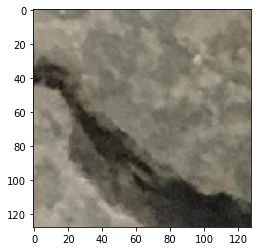

In [18]:
sample = train_dataset.next();
#print(sample)
plt.imshow(sample[0][0])
train_dataset.reset()


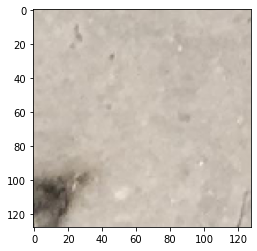

In [21]:
sample2 = val_dataset.next();
#print(sample)
plt.imshow(sample2[0][0])
val_dataset.reset()


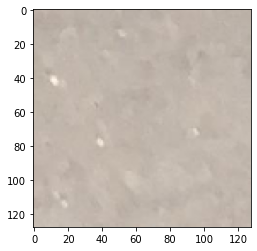

In [132]:
test_dataset.reset()
sample3 = test_dataset.next();
#print(sample)
plt.imshow(sample3[0][31])



In [8]:
model = Sequential()

model.add(Conv2D(16,(3,3),input_shape=input_shape,activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(AveragePooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(AveragePooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(AveragePooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(AveragePooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 16)      2320      
_________________________________________________________________
average_pooling2d (AveragePo (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 32)        9248      
_________________________________________________________________
average_pooling2d_1 (Average (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 64)       

In [9]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'),
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    min_delta=0.001, 
    mode='auto'
)
custom_checkpointer = ModelCheckpoint(filepath = "D:\working folder\data Sciense\DataSet\Kaggle\Concrete Crack Images for Classification-Kaggle\capstone\best.hdf5", monitor = 'val_accuracy', save_best_only = True, mode = 'auto')

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=METRICS)

In [11]:
history=model.fit_generator(train_dataset,steps_per_epoch=3400//batch_size,epochs=25,validation_data=val_dataset,validation_steps=480//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
106/106 [==============================] - 55s 519ms/step - loss: 1.5438 - tp: 1333.0000 - fp: 323.0000 - tn: 1364.0000 - fn: 348.0000 - accuracy: 0.8008 - precision: 0.8050 - recall: 0.7930 - auc: 0.8804 - val_loss: 1.1985 - val_tp: 116.0000 - val_fp: 0.0000e+00 - val_tn: 240.0000 - val_fn: 124.0000 - val_accuracy: 0.7417 - val_precision: 1.0000 - val_recall: 0.4833 - val_auc: 0.8703
Epoch 2/25
106/106 [==============================] - 52s 491ms/step - loss: 0.4962 - tp: 1560.0000 - fp: 84.0000 - tn: 1605.0000 - fn: 119.0000 - accuracy: 0.9397 - precision: 0.9489 - recall: 0.9291 - auc: 0.9742 - val_loss: 0.0835 - val_tp: 234.0000 - val_fp: 6.0000 - val_tn: 234.0000 - val_fn: 6.0000 - val_accuracy: 0.9750 - val_precision: 0.9750 - val_recall: 0.9750 - val_auc: 0.9939
Epoch 3/25
106/106 [==============================] - 55s 523ms/step - loss: 0.4803 - tp: 1623.0000 - fp: 108.0000 - tn: 1580.0000 - 

106/106 [==============================] - 52s 492ms/step - loss: 0.0374 - tp: 1675.0000 - fp: 11.0000 - tn: 1673.0000 - fn: 9.0000 - accuracy: 0.9941 - precision: 0.9935 - recall: 0.9947 - auc: 0.9975 - val_loss: 0.1006 - val_tp: 240.0000 - val_fp: 5.0000 - val_tn: 235.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9896 - val_precision: 0.9796 - val_recall: 1.0000 - val_auc: 0.9937
Epoch 22/25
106/106 [==============================] - 52s 492ms/step - loss: 0.0204 - tp: 1675.0000 - fp: 5.0000 - tn: 1681.0000 - fn: 7.0000 - accuracy: 0.9964 - precision: 0.9970 - recall: 0.9958 - auc: 0.9987 - val_loss: 0.0227 - val_tp: 240.0000 - val_fp: 3.0000 - val_tn: 237.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.9937 - val_precision: 0.9877 - val_recall: 1.0000 - val_auc: 0.9999
Epoch 23/25
106/106 [==============================] - 53s 497ms/step - loss: 0.2159 - tp: 1671.0000 - fp: 25.0000 - tn: 1662.0000 - fn: 10.0000 - accuracy: 0.9896 - precision: 0.9853 - recall: 0.9941 - auc: 0.9924 - val_lo

In [21]:
history.history['val_loss']

[1.1984889507293701,
 0.08346868306398392,
 0.10256990045309067,
 0.08211275935173035,
 0.04119375720620155,
 0.051311783492565155,
 0.03172442689538002,
 0.08311077952384949,
 0.04574577510356903,
 0.06920876353979111,
 0.0652977004647255,
 0.07499158382415771,
 0.07799696922302246,
 0.08000921458005905,
 0.059866104274988174,
 0.10809256881475449,
 0.29730695486068726,
 0.05470315366983414,
 0.036106176674366,
 0.05958302691578865,
 0.10055271536111832,
 0.022655395790934563,
 0.043149515986442566,
 0.04740725830197334,
 0.0862022191286087]

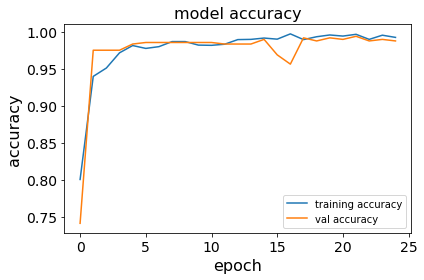

<Figure size 432x288 with 0 Axes>

In [13]:
fig, ax = plt.subplots()

ax.plot(history.history['accuracy'],label='training accuracy')
ax.plot(history.history['val_accuracy'],label='val accuracy')

ax.set_title('model accuracy',{'size':16})
ax.set_xlabel('epoch',{'size':16})
ax.set_ylabel('accuracy',{'size':16})
              
plt.tick_params(labelsize=14)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
plt.savefig('test.png', bbox_inches='tight')

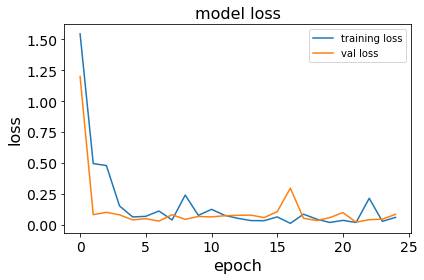

In [14]:
fig, ax = plt.subplots()

ax.plot(history.history['loss'],label='training loss')
ax.plot(history.history['val_loss'],label='val loss')

ax.set_title('model loss',{'size':16})
ax.set_xlabel('epoch',{'size':16})
ax.set_ylabel('loss',{'size':16})
              
plt.tick_params(labelsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [31]:
test_dataset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

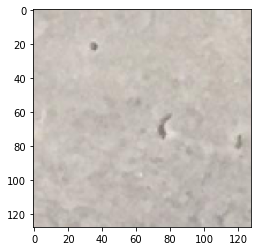

0,0un-Cracked is predicted as un-Cracked


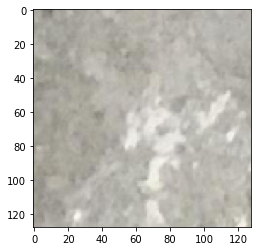

1,0un-Cracked is predicted as un-Cracked


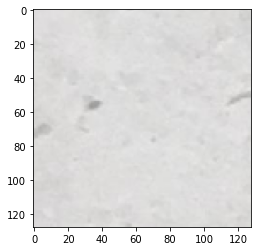

2,0un-Cracked is predicted as un-Cracked


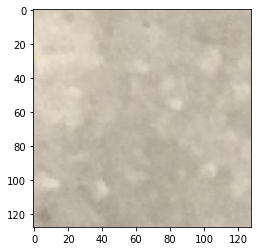

3,0un-Cracked is predicted as un-Cracked


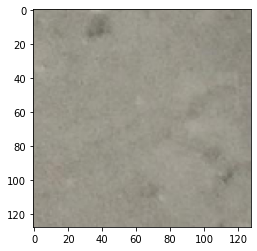

4,0un-Cracked is predicted as un-Cracked


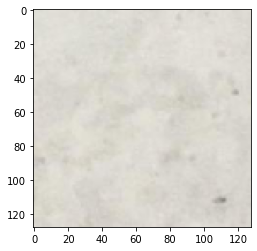

5,0un-Cracked is predicted as un-Cracked


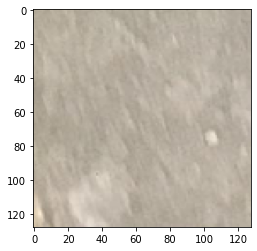

6,0un-Cracked is predicted as un-Cracked


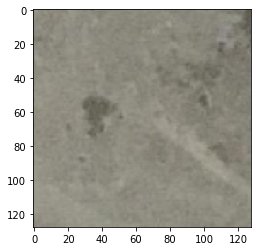

7,0un-Cracked is predicted as un-Cracked


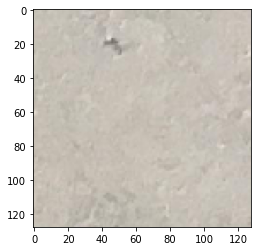

8,0un-Cracked is predicted as un-Cracked


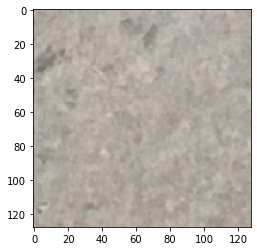

9,0un-Cracked is predicted as un-Cracked


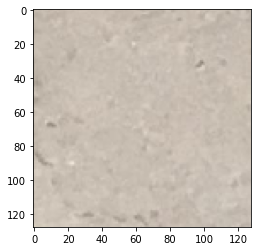

10,0un-Cracked is predicted as un-Cracked


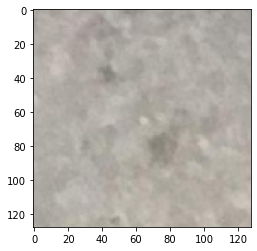

11,0un-Cracked is predicted as un-Cracked


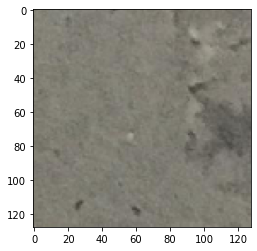

12,0un-Cracked is predicted as un-Cracked


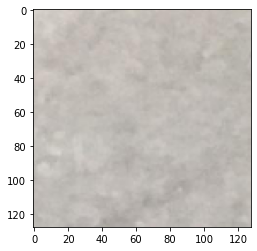

13,0un-Cracked is predicted as un-Cracked


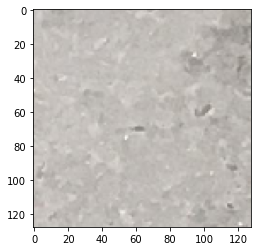

14,0un-Cracked is predicted as un-Cracked


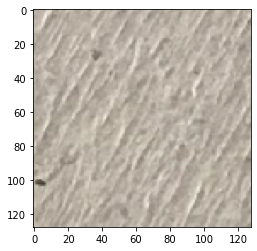

15,0un-Cracked is predicted as un-Cracked


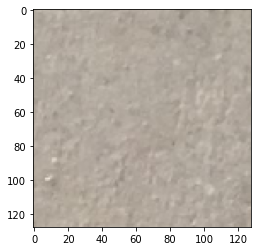

16,0un-Cracked is predicted as un-Cracked


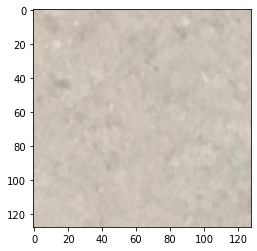

17,0un-Cracked is predicted as un-Cracked


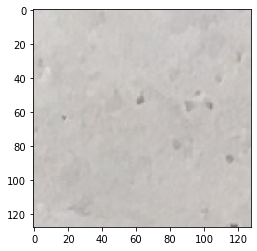

18,0un-Cracked is predicted as un-Cracked


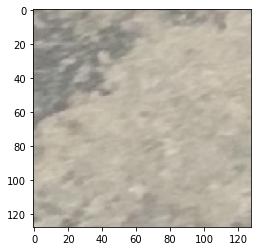

19,0un-Cracked is predicted as un-Cracked


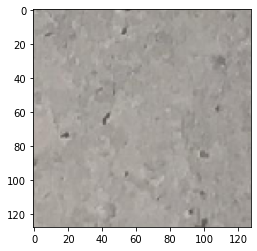

20,0un-Cracked is predicted as un-Cracked


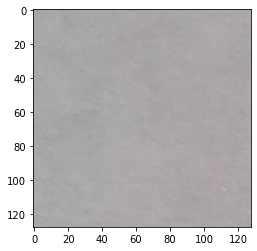

21,0un-Cracked is predicted as un-Cracked


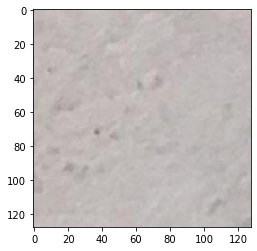

22,0un-Cracked is predicted as un-Cracked


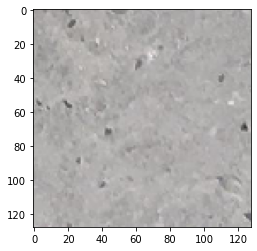

23,0un-Cracked is predicted as un-Cracked


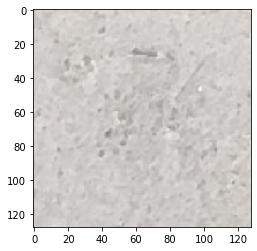

24,0un-Cracked is predicted as un-Cracked


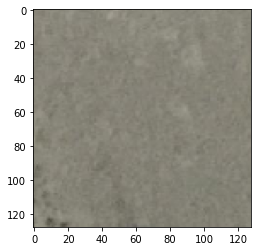

25,0un-Cracked is predicted as un-Cracked


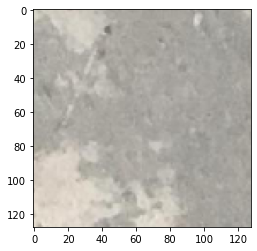

26,0un-Cracked is predicted as un-Cracked


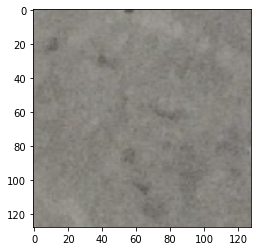

27,0un-Cracked is predicted as un-Cracked


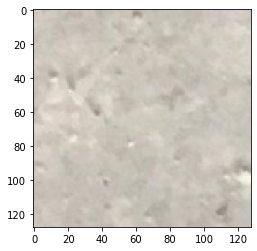

28,0un-Cracked is predicted as un-Cracked


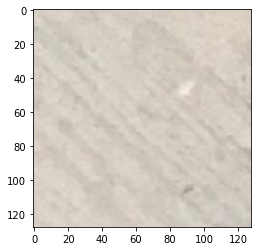

29,0un-Cracked is predicted as un-Cracked


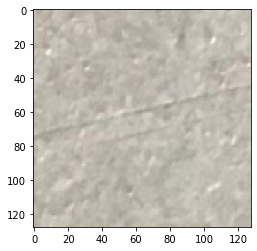

30,0un-Cracked is predicted as un-Cracked


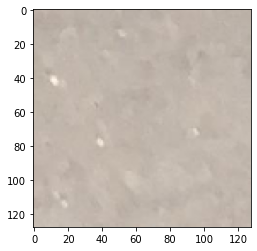

31,0un-Cracked is predicted as un-Cracked


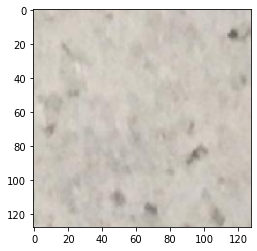

0,1un-Cracked is predicted as un-Cracked


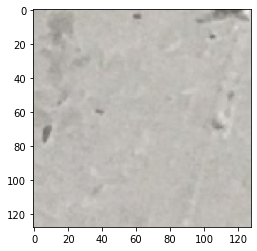

1,1un-Cracked is predicted as un-Cracked


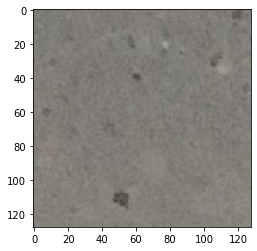

2,1un-Cracked is predicted as un-Cracked


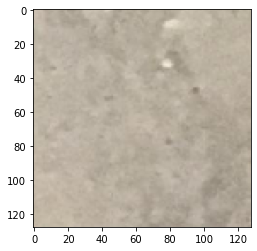

3,1un-Cracked is predicted as un-Cracked


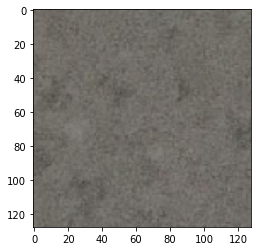

4,1un-Cracked is predicted as un-Cracked


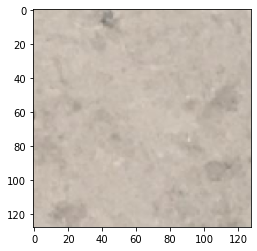

5,1un-Cracked is predicted as un-Cracked


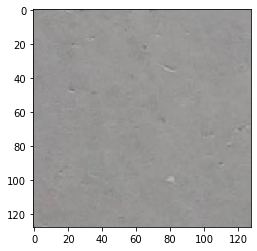

6,1un-Cracked is predicted as un-Cracked


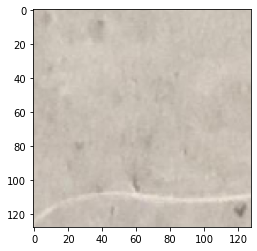

7,1un-Cracked is predicted as un-Cracked


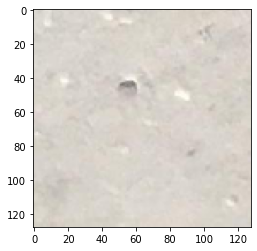

8,1un-Cracked is predicted as un-Cracked


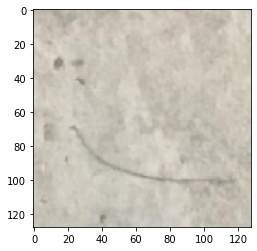

9,1un-Cracked is predicted as un-Cracked


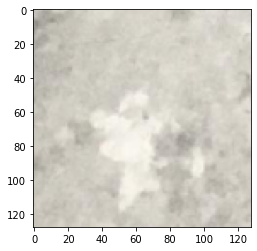

10,1un-Cracked is predicted as un-Cracked


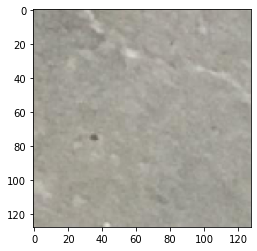

11,1un-Cracked is predicted as un-Cracked


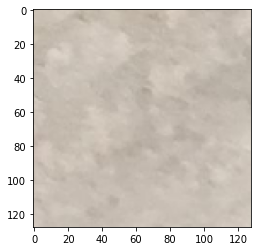

12,1un-Cracked is predicted as un-Cracked


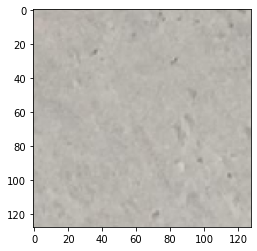

13,1un-Cracked is predicted as un-Cracked


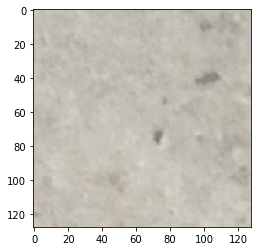

14,1un-Cracked is predicted as un-Cracked


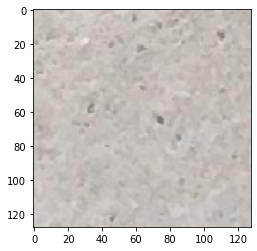

15,1un-Cracked is predicted as un-Cracked


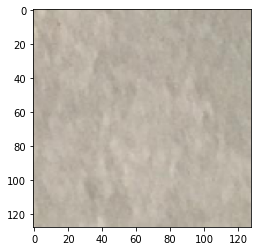

16,1un-Cracked is predicted as un-Cracked


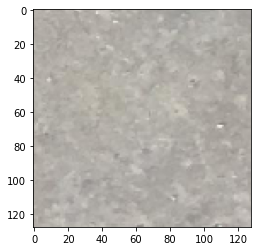

17,1un-Cracked is predicted as un-Cracked


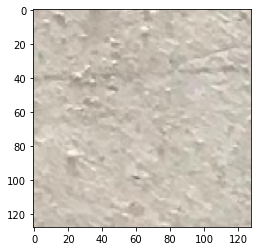

18,1un-Cracked is predicted as un-Cracked


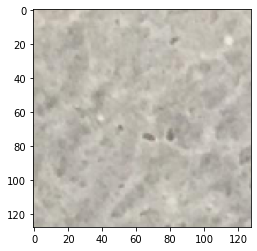

19,1un-Cracked is predicted as un-Cracked


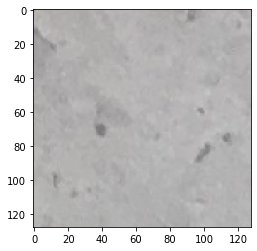

20,1un-Cracked is predicted as un-Cracked


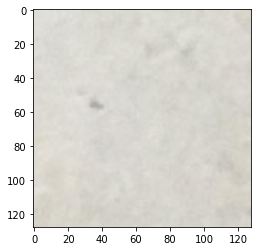

21,1un-Cracked is predicted as un-Cracked


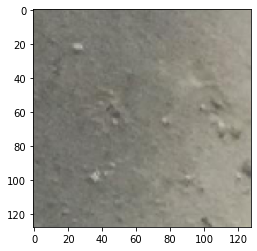

22,1un-Cracked is predicted as un-Cracked


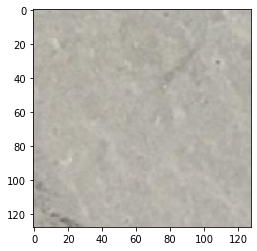

23,1un-Cracked is predicted as un-Cracked


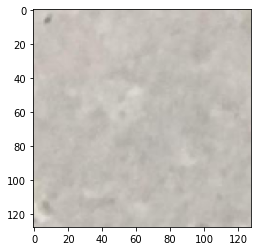

24,1un-Cracked is predicted as un-Cracked


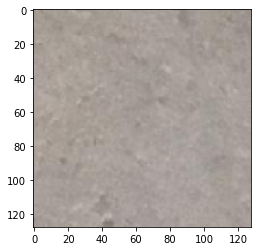

25,1un-Cracked is predicted as un-Cracked


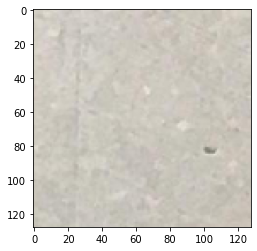

26,1un-Cracked is predicted as un-Cracked


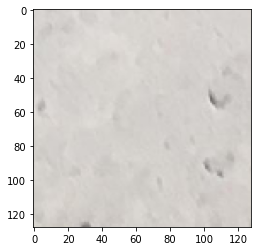

27,1un-Cracked is predicted as un-Cracked


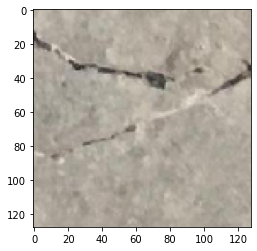

28,1Cracked is predicted as Cracked


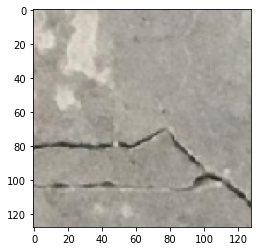

29,1Cracked is predicted as Cracked


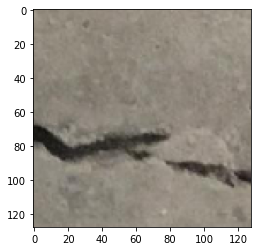

30,1Cracked is predicted as Cracked


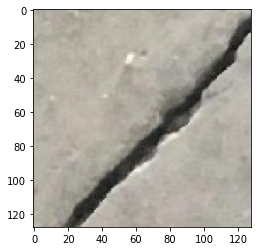

31,1Cracked is predicted as Cracked


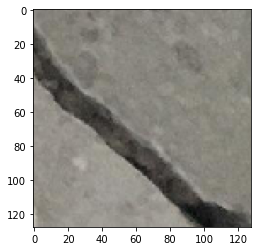

0,2Cracked is predicted as Cracked


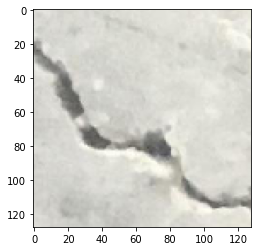

1,2Cracked is predicted as Cracked


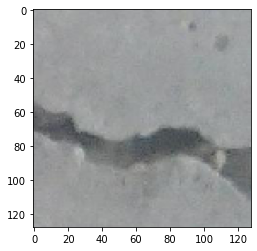

2,2Cracked is predicted as Cracked


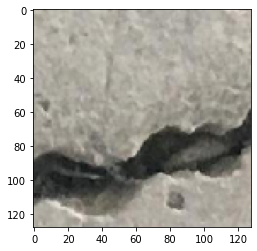

3,2Cracked is predicted as Cracked


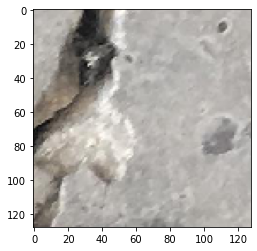

4,2Cracked is predicted as Cracked


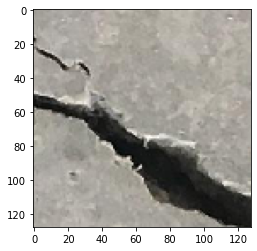

5,2Cracked is predicted as Cracked


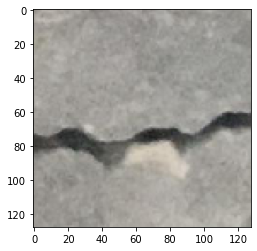

6,2Cracked is predicted as Cracked


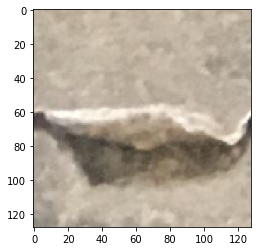

7,2Cracked is predicted as Cracked


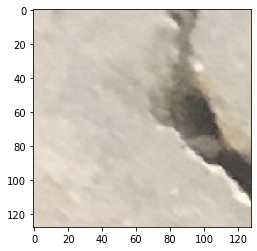

8,2Cracked is predicted as Cracked


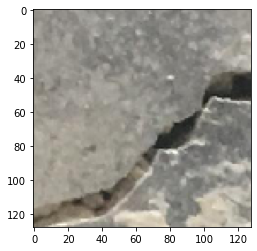

9,2Cracked is predicted as Cracked


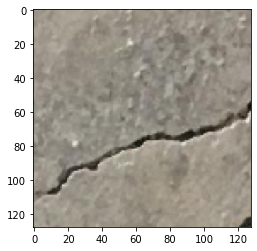

10,2Cracked is predicted as Cracked


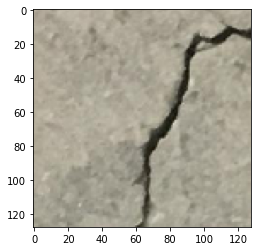

11,2Cracked is predicted as Cracked


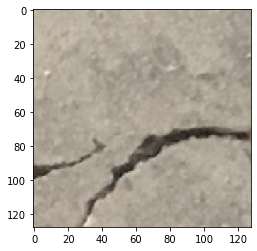

12,2Cracked is predicted as Cracked


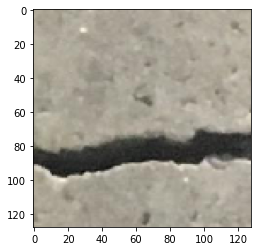

13,2Cracked is predicted as Cracked


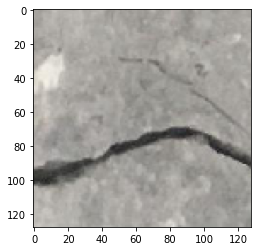

14,2Cracked is predicted as Cracked


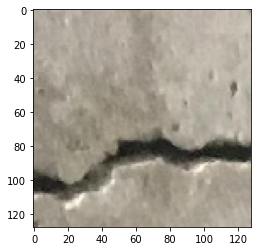

15,2Cracked is predicted as Cracked


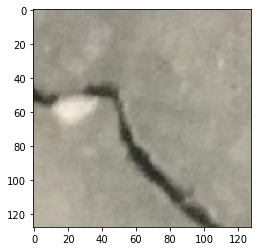

16,2Cracked is predicted as Cracked


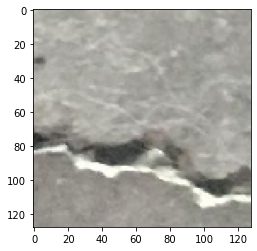

17,2Cracked is predicted as Cracked


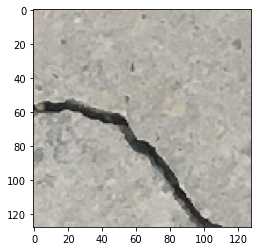

18,2Cracked is predicted as Cracked


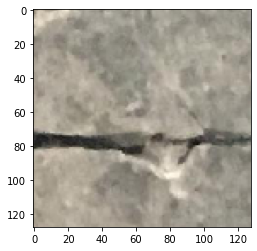

19,2Cracked is predicted as Cracked


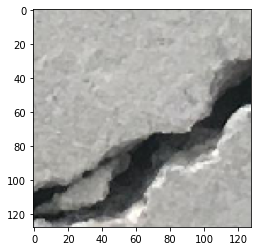

20,2Cracked is predicted as Cracked


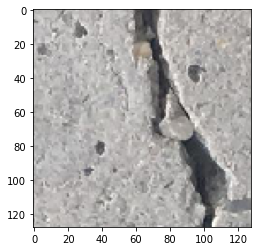

21,2Cracked is predicted as Cracked


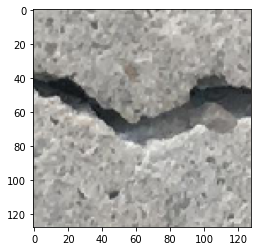

22,2Cracked is predicted as Cracked


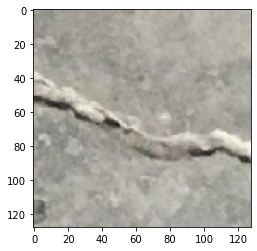

23,2Cracked is predicted as Cracked


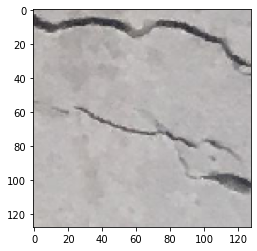

24,2Cracked is predicted as Cracked


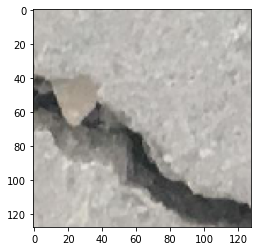

25,2Cracked is predicted as Cracked


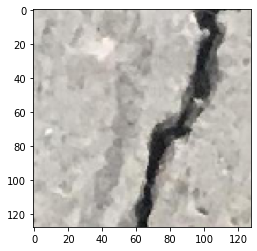

26,2Cracked is predicted as Cracked


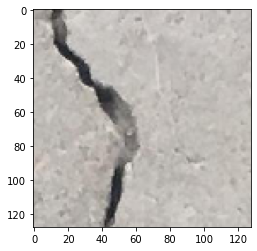

27,2Cracked is predicted as Cracked


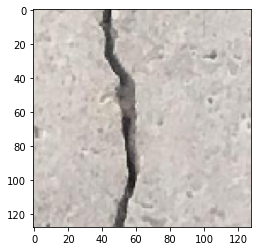

28,2Cracked is predicted as Cracked


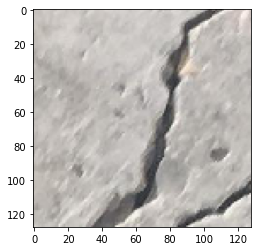

29,2Cracked is predicted as Cracked


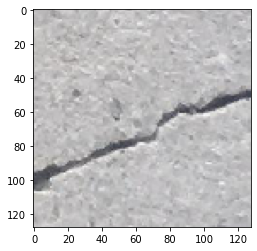

30,2Cracked is predicted as Cracked


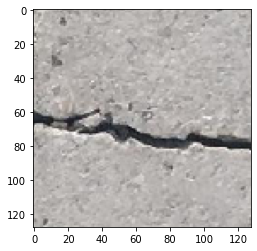

31,2Cracked is predicted as Cracked


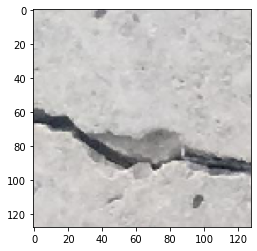

0,3Cracked is predicted as Cracked


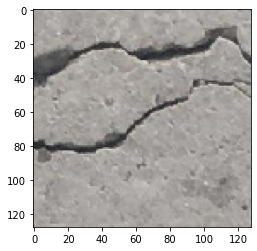

1,3Cracked is predicted as Cracked


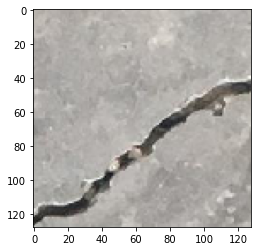

2,3Cracked is predicted as Cracked


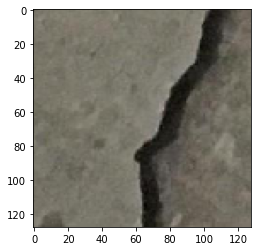

3,3Cracked is predicted as Cracked


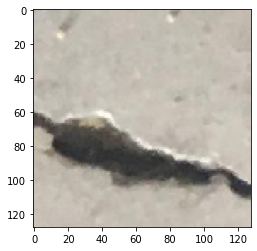

4,3Cracked is predicted as Cracked


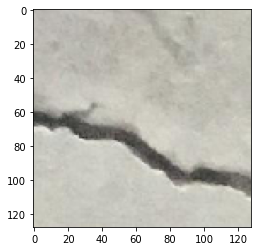

5,3Cracked is predicted as Cracked


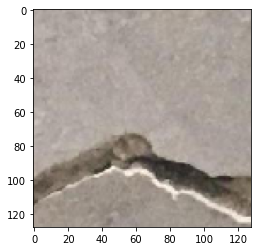

6,3Cracked is predicted as Cracked


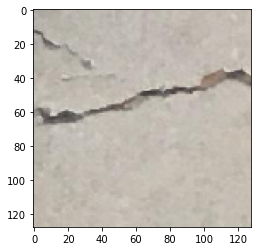

7,3Cracked is predicted as Cracked


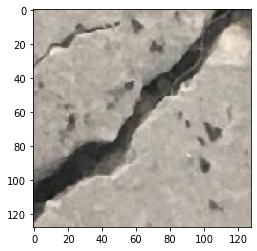

8,3Cracked is predicted as Cracked


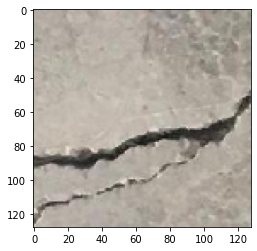

9,3Cracked is predicted as Cracked


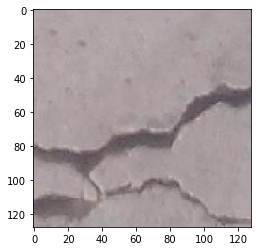

10,3Cracked is predicted as Cracked


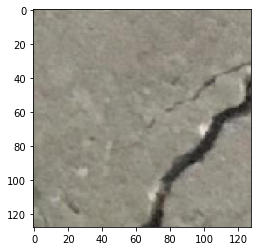

11,3Cracked is predicted as Cracked


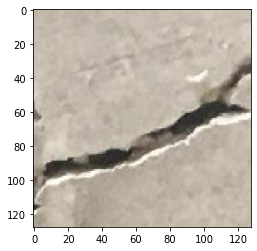

12,3Cracked is predicted as Cracked


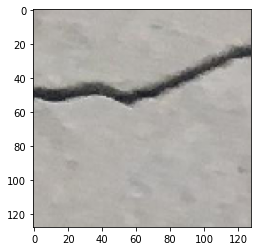

13,3Cracked is predicted as Cracked


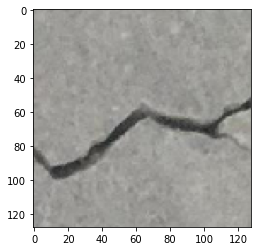

14,3Cracked is predicted as Cracked


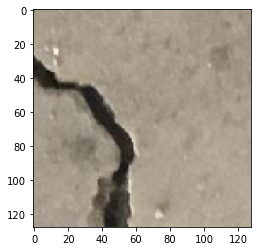

15,3Cracked is predicted as Cracked


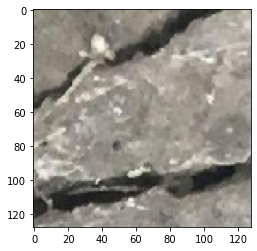

16,3Cracked is predicted as Cracked


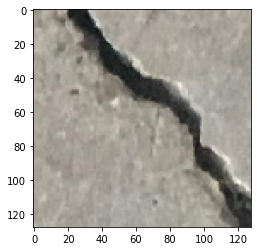

17,3Cracked is predicted as Cracked


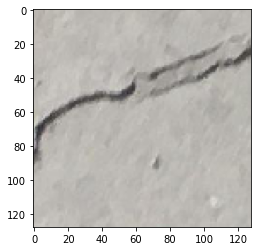

18,3Cracked is predicted as Cracked


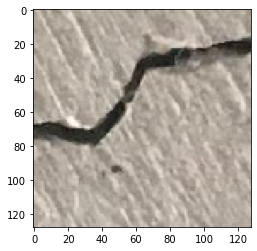

19,3Cracked is predicted as Cracked


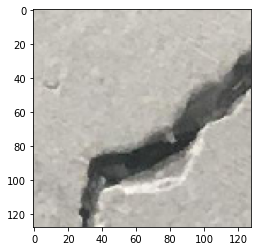

20,3Cracked is predicted as Cracked


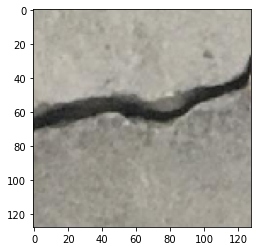

21,3Cracked is predicted as Cracked


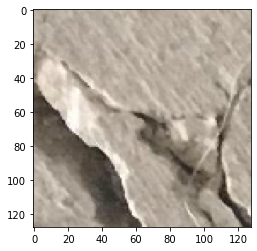

22,3Cracked is predicted as Cracked


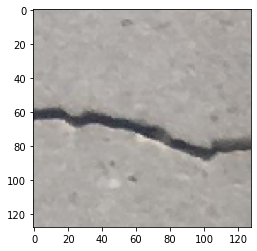

23,3Cracked is predicted as Cracked


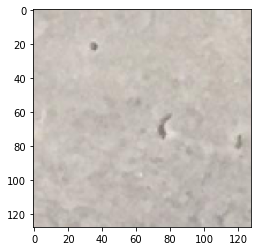

0,4un-Cracked is predicted as un-Cracked


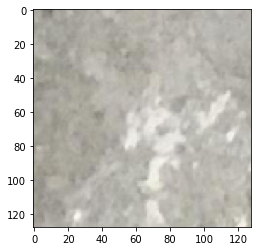

1,4un-Cracked is predicted as un-Cracked


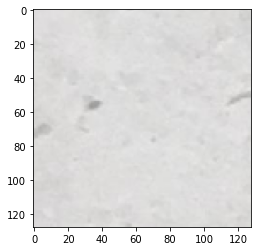

2,4un-Cracked is predicted as un-Cracked


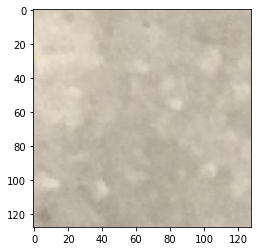

3,4un-Cracked is predicted as un-Cracked


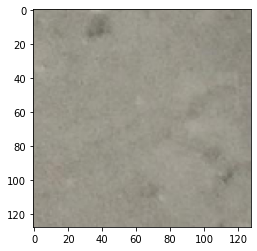

4,4un-Cracked is predicted as un-Cracked


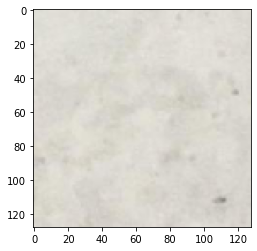

5,4un-Cracked is predicted as un-Cracked


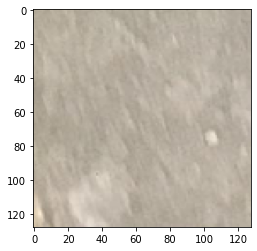

6,4un-Cracked is predicted as un-Cracked


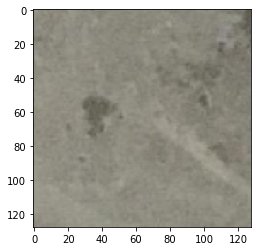

7,4un-Cracked is predicted as un-Cracked


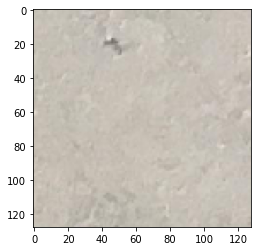

8,4un-Cracked is predicted as un-Cracked


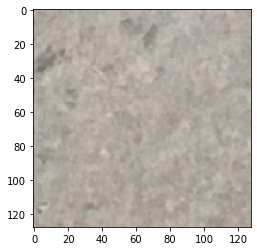

9,4un-Cracked is predicted as un-Cracked


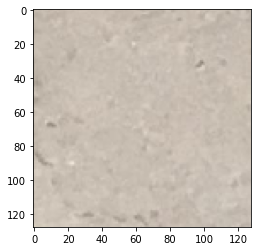

10,4un-Cracked is predicted as un-Cracked


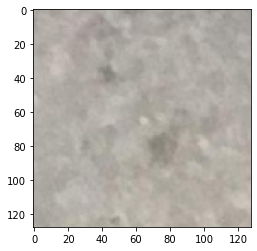

11,4un-Cracked is predicted as un-Cracked


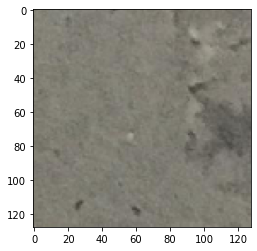

12,4un-Cracked is predicted as un-Cracked


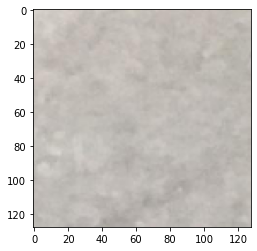

13,4un-Cracked is predicted as un-Cracked


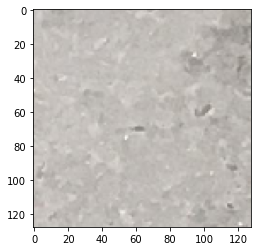

14,4un-Cracked is predicted as un-Cracked


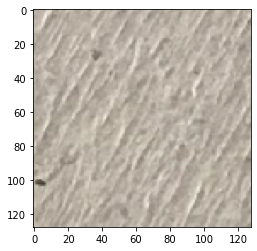

15,4un-Cracked is predicted as un-Cracked


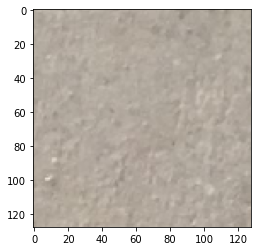

16,4un-Cracked is predicted as un-Cracked


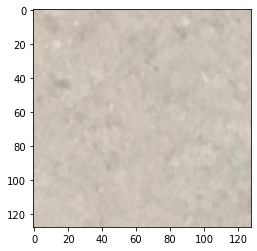

17,4un-Cracked is predicted as un-Cracked


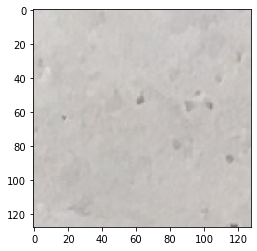

18,4un-Cracked is predicted as un-Cracked


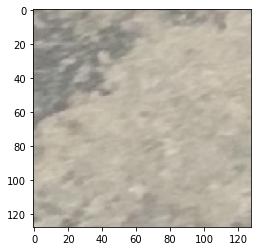

19,4un-Cracked is predicted as un-Cracked


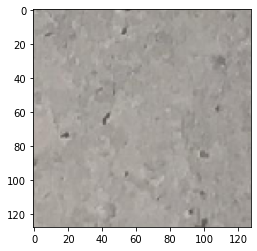

20,4un-Cracked is predicted as un-Cracked


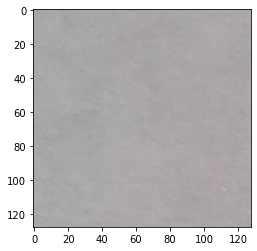

21,4un-Cracked is predicted as un-Cracked


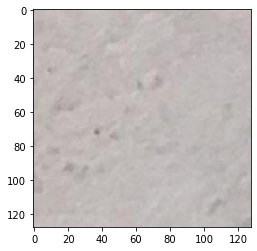

22,4un-Cracked is predicted as un-Cracked


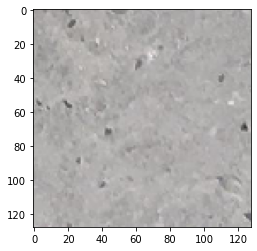

23,4un-Cracked is predicted as un-Cracked


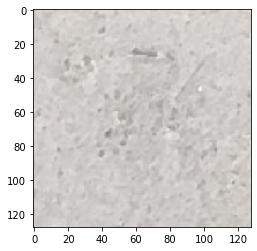

24,4un-Cracked is predicted as un-Cracked


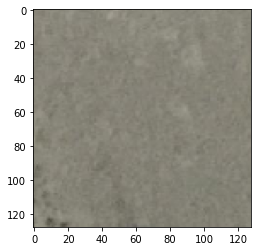

25,4un-Cracked is predicted as un-Cracked


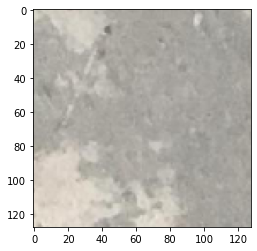

26,4un-Cracked is predicted as un-Cracked


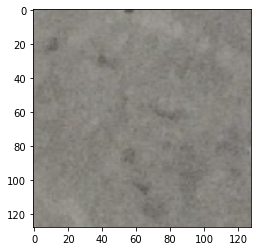

27,4un-Cracked is predicted as un-Cracked


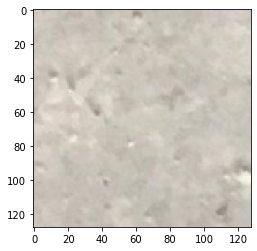

28,4un-Cracked is predicted as un-Cracked


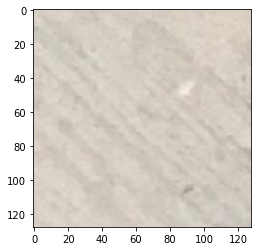

29,4un-Cracked is predicted as un-Cracked


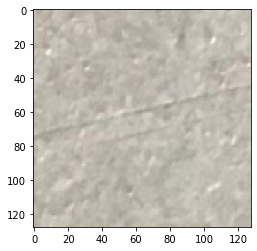

30,4un-Cracked is predicted as un-Cracked


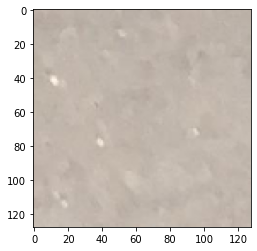

31,4un-Cracked is predicted as un-Cracked


In [146]:
test_dataset.reset() 
for j in range(test_dataset.__len__()+1):
    x,y= test_dataset.next()
    preds = model.predict(x)
    for i in range(preds.shape[0]):
      image = x[i]
      plt.imshow(image)
      plt.show()  
      target=y[i]
      p=preds[i]
    
      if target == 1 and p > 0.5:
            #print('TP')
            path=os.path.join(path_result, "TP") 
      elif target == 1 and p <= 0.5:
            #print('FN')
            path=os.path.join(path_result, "FN")
            
      elif target == 0 and p > 0.5:
            #print('FP')
            path=os.path.join(path_result, "FP")
      else:
            path=os.path.join(path_result, "TN")
            #print('TN')
            
      cv2.imwrite(path + '/%.4f_%04d.jpg' % (i, j), image*255)
    
    
    
    
      title='Cracked' if y[i]==1 else "un-Cracked"
      pred='Cracked' if preds[i]>=.5 else "un-Cracked"
      print(str(i)+','+str(j)+(title) +' is predicted as '+(pred) )
